# Gemini API: Prompting Quickstart with REST

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/gemini-api-cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>


If you want to quickly try out the Gemini API, you can use `curl` commands to call the methods in the REST API.

This notebook contains `curl` commands you can run in Google Colab, or copy to your terminal.

To run this notebook, your API key must be stored it in a Colab Secret named GOOGLE_API_KEY. If you are running in a different environment, you can store your key in an environment variable. See [Authentication](https://github.com/google-gemini/gemini-api-cookbook/blob/main/quickstarts/Authentication.ipynb) to learn more.

In [ ]:
import os
from google.colab import userdata

In [ ]:
os.environ['GOOGLE_API_KEY'] = userdata.get('GOOGLE_API_KEY')

## Gemini and `Content` based APIs

### Text-only input

Use the `generateContent` method to generate a response from the model given an input message. If the input contains only text, use the `gemini-pro` model.

In [ ]:
!curl https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?key=$GOOGLE_API_KEY \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{ \
      "contents": [{ \
        "parts":[{ \
          "text": "Write a story about a magic backpack."}]}]}' 2> /dev/null

{
  "candidates": [
    {
      "content": {
        "parts": [
          {
            "text": "In the quaint town of Willow Creek, nestled amidst rolling hills, resided a curious young girl named Anya. Her life took an extraordinary turn on a seemingly ordinary day when she stumbled upon a peculiar backpack discarded in an antique shop's dusty corner.\n\nCuriosity piqued, Anya gingerly unzipped the backpack's faded canvas. To her astonishment, instead of textbooks or school supplies, she found a kaleidoscope of glimmering crystals, shimmering gems, and intricate scrolls. As she reached into its depths, a surge of energy coursed through her body.\n\nUnbeknownst to Anya, this was no ordinary knapsack; it was a relic from an ancient magical realm. Each of its compartments held mystical treasures, granting its possessor extraordinary abilities. The first compartment contained a sapphire amulet that bestowed the power of telekinesis, allowing Anya to manipulate objects with her mind. The 

### Text-and-image input

If the input contains both text and image, use the `gemini-pro-vision` model. The following snippets help you build a request and send it to the REST API.

In [ ]:
!curl -o image.jpg https://storage.googleapis.com/generativeai-downloads/images/scones.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  385k  100  385k    0     0  2689k      0 --:--:-- --:--:-- --:--:-- 2695k


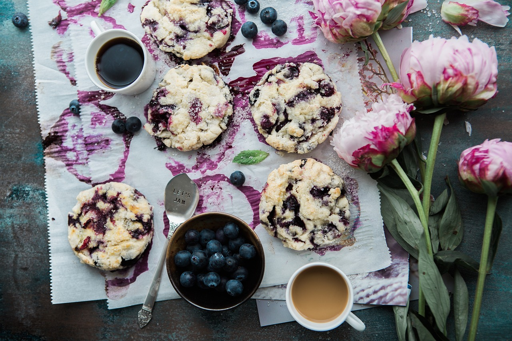

In [ ]:
import PIL.Image

img = PIL.Image.open("image.jpg")
img.resize((512, int(img.height*512/img.width)))

In [ ]:
!echo '{ \
  "contents":[ \
    { \
      "parts":[ \
        {"text": "What is this picture?"}, \
        { \
          "inline_data": { \
            "mime_type":"image/jpeg", \
            "data": "'$(base64 -w0 image.jpg)'" \
          } \
        } \
      ] \
    } \
  ] \
}' > request.json

In [ ]:
!curl https://generativelanguage.googleapis.com/v1beta/models/gemini-pro-vision:generateContent?key=${API_KEY} \
        -H 'Content-Type: application/json' \
        -d @request.json 2> /dev/null | grep "text"

            "text": " The picture shows a table with a white tablecloth. On the table are two cups of coffee, a bowl of blueberries, a silver spoon, and some flowers. There are also some scones with blueberries on the table."


### Multi-turn conversations (chat)

Using Gemini, you can build freeform conversations across multiple turns.

In [ ]:
!curl https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?key=$API_KEY \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{ \
      "contents": [ \
        {"role":"user", \
         "parts":[{ \
           "text": "Write the first line of a story about a magic backpack."}]}, \
        {"role": "model", \
         "parts":[{ \
           "text": "In the bustling city of Meadow brook, lived a young girl named Sophie. She was a bright and curious soul with an imaginative mind."}]}, \
        {"role": "user", \
         "parts":[{ \
           "text": "Can you set it in a quiet village in 1600s France?"}]}, \
      ] \
    }' 2> /dev/null | grep "text"

            "text": "Nestled amidst the rolling hills and whispering willows of a tranquil village in 17th-century France, there lived a young maiden named Antoinette."


**Note**: The `gemini-pro-vision model` (for text-and-image input) is not yet optimized for multi-turn conversations. Make sure to use `gemini-pro` and text-only input for chat use cases.

### Configuration

Every prompt you send to the model includes parameter values that control how the model generates a response. The model can generate different results for different parameter values. Learn more about [model parameters](https://ai.google.dev/docs/concepts#model_parameters).

Also, you can use safety settings to adjust the likelihood of getting responses that may be considered harmful. By default, safety settings block content with medium and/or high probability of being unsafe content across all dimensions. Learn more about [safety settings](https://ai.google.dev/docs/concepts#model_parameters).

The following example specifies values for all the parameters of the generateContent method.

In [ ]:
!curl https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent?key=$API_KEY \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{ \
        "contents": [{ \
            "parts":[ \
                {"text": "Write a story about a magic backpack."} \
            ] \
        }], \
        "safetySettings": [ \
            { \
                "category": "HARM_CATEGORY_DANGEROUS_CONTENT", \
                "threshold": "BLOCK_ONLY_HIGH" \
            } \
        ], \
        "generationConfig": { \
            "stopSequences": [ \
                "Title" \
            ], \
            "temperature": 1.0, \
            "maxOutputTokens": 800, \
            "topP": 0.8, \
            "topK": 10 \
        } \
    }'  2> /dev/null | grep "text"

            "text": "In the quaint town of Willow Creek, nestled amidst rolling hills and whispering willows, there lived an ordinary boy named Ethan. Ethan's life took an extraordinary turn when he stumbled upon a dusty old backpack in the attic of his grandmother's cottage.\n\nAs Ethan opened the worn-out zippers, a soft glow illuminated the room. Inside, he discovered a collection of peculiar objects: a shimmering amulet, a whispering compass, and a book bound in ancient leather. Intrigued, he slipped the backpack over his shoulders and set out on an adventure.\n\nAt first, the backpack seemed like any other. But as Ethan delved deeper into the wilderness, he noticed strange occurrences. The amulet began to pulsate with warmth, guiding him through dense undergrowth. The compass whispered secrets of hidden trails and lost treasures.\n\nOne sunny afternoon, as Ethan was exploring a secluded meadow, he heard a faint cry for help. He followed the sound to a thicket, where he found a you

### Count Tokens

When using long prompts, it might be useful to count tokens before sending any content to the model.

In [ ]:
!curl https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:countTokens?key=$API_KEY \
    -H 'Content-Type: application/json' \
    -X POST \
    -d '{ \
      "contents": [{ \
        "parts":[{ \
          "text": "Write a story about a magic backpack."}]}]}' > response.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   130    0    23  100   107     76    355 --:--:-- --:--:-- --:--:--   433


In [ ]:
!cat response.json

{
  "totalTokens": 8
}
